<a href="https://colab.research.google.com/github/vipulshah31120/Sleep_Health_Pattern/blob/main/Sleep_Health_Pattern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings ### To ignore warnings

### Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score

## **Importing Data**

In [ ]:
### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)

df = pd.read_csv('/content/drive/MyDrive/raw-dataset.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


# **Data Understanding**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

**None**: The individual does not exhibit any specific sleep disorder.

**Insomnia**: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.

**Sleep Apnea**: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

## **Data Exploration**

In [ ]:
# To find how many unique values present in each column
for col in df.columns:
  print('{} has {} unique categories'.format(col,df[col].nunique()))


Person ID has 374 unique categories
Gender has 2 unique categories
Age has 31 unique categories
Occupation has 11 unique categories
Sleep Duration has 27 unique categories
Quality of Sleep has 6 unique categories
Physical Activity Level has 16 unique categories
Stress Level has 6 unique categories
BMI Category has 4 unique categories
Blood Pressure has 25 unique categories
Heart Rate has 19 unique categories
Daily Steps has 20 unique categories
Sleep Disorder has 3 unique categories


In [ ]:
df.drop_duplicates(inplace=True)
df.dropna()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


## **Exploratory Data Analysis**

### **Univariate Analysis**
Divided the columns based on numerical and categorical values

In [ ]:
num_cols = list(df.select_dtypes(['int', 'float']).columns)
num_cols

['Person ID',
 'Age',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'Heart Rate',
 'Daily Steps']

In [ ]:
cat_cols = list([x for x in df.columns if x not in num_cols])
cat_cols

['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']

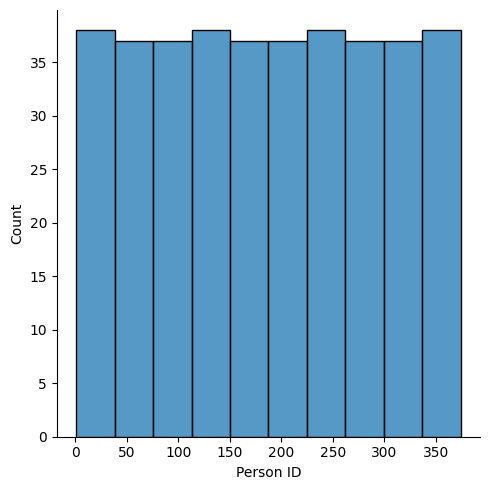

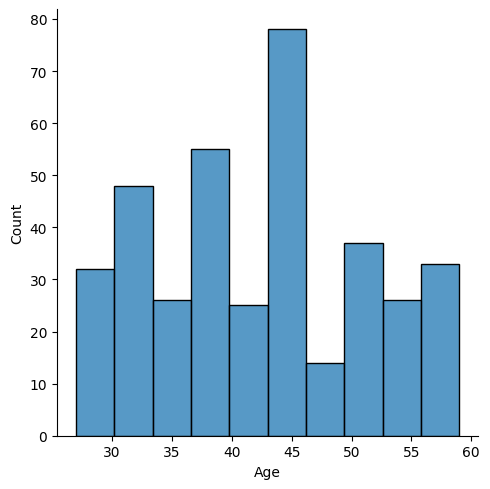

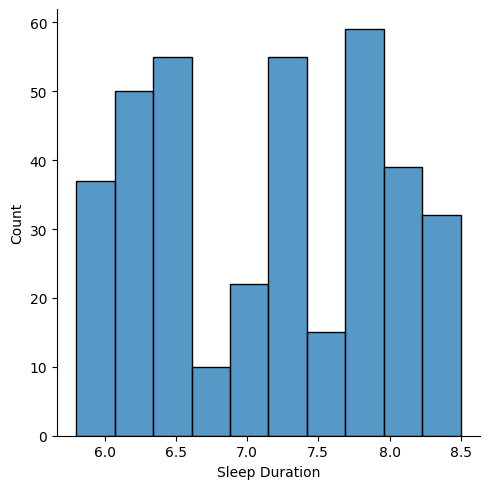

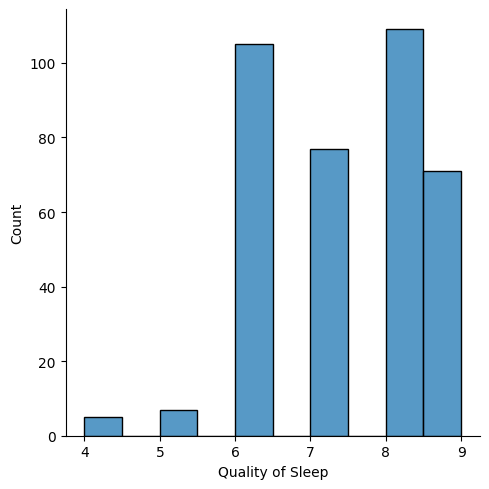

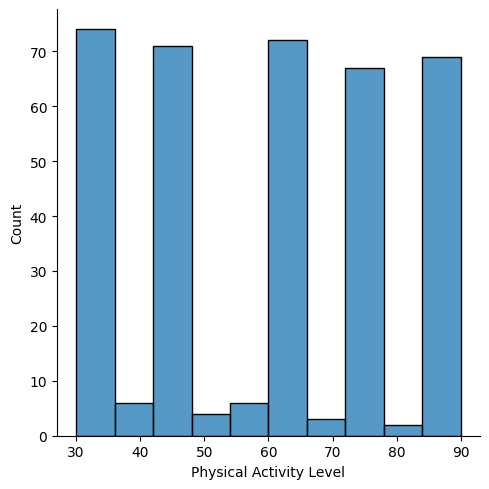

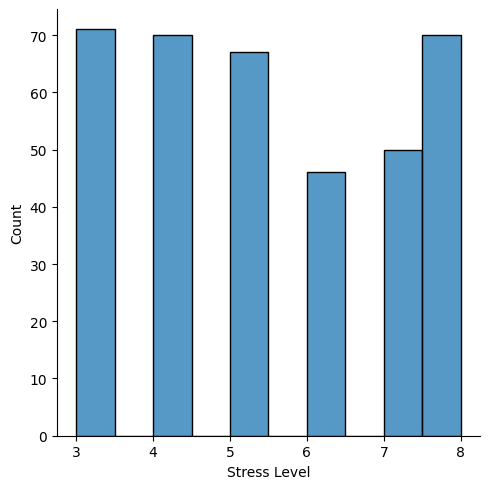

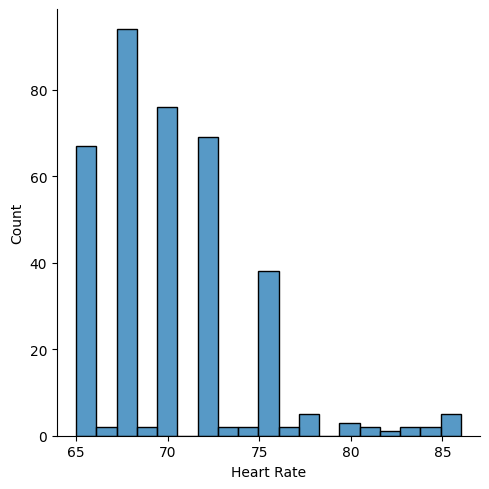

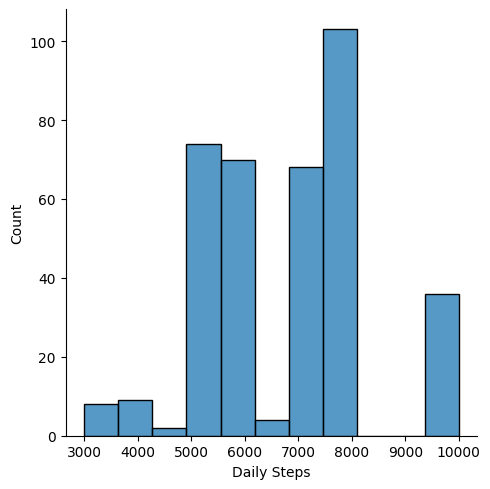

In [ ]:
for i in num_cols:
  sns.displot(df[i])
  plt.show()

In [ ]:
(df.select_dtypes(include=['float64', 'int64']).skew() > 0).index

Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps'],
      dtype='object')

**In numerical/continuous variables found: Age, Sleep duration, Quallity of sleep, Physical activty level, Stress levelheart rate, daily steps as skewed**

In [ ]:
# bifercated 'Blood Pressure' to 'BP  High' and 'BP Low'
df[['BP High', 'BP Low']] = df['Blood Pressure'].str.split('/', expand=True)
df.drop('Blood Pressure', axis=1, inplace=True)
df.head(3)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BP High,BP Low
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80


In [ ]:
#To change the datatype of Blood Pressure
df['BP High'] = df['BP High'].astype(int)
df['BP Low'] = df['BP Low'].astype(int)

## **Checking Distribution of features**

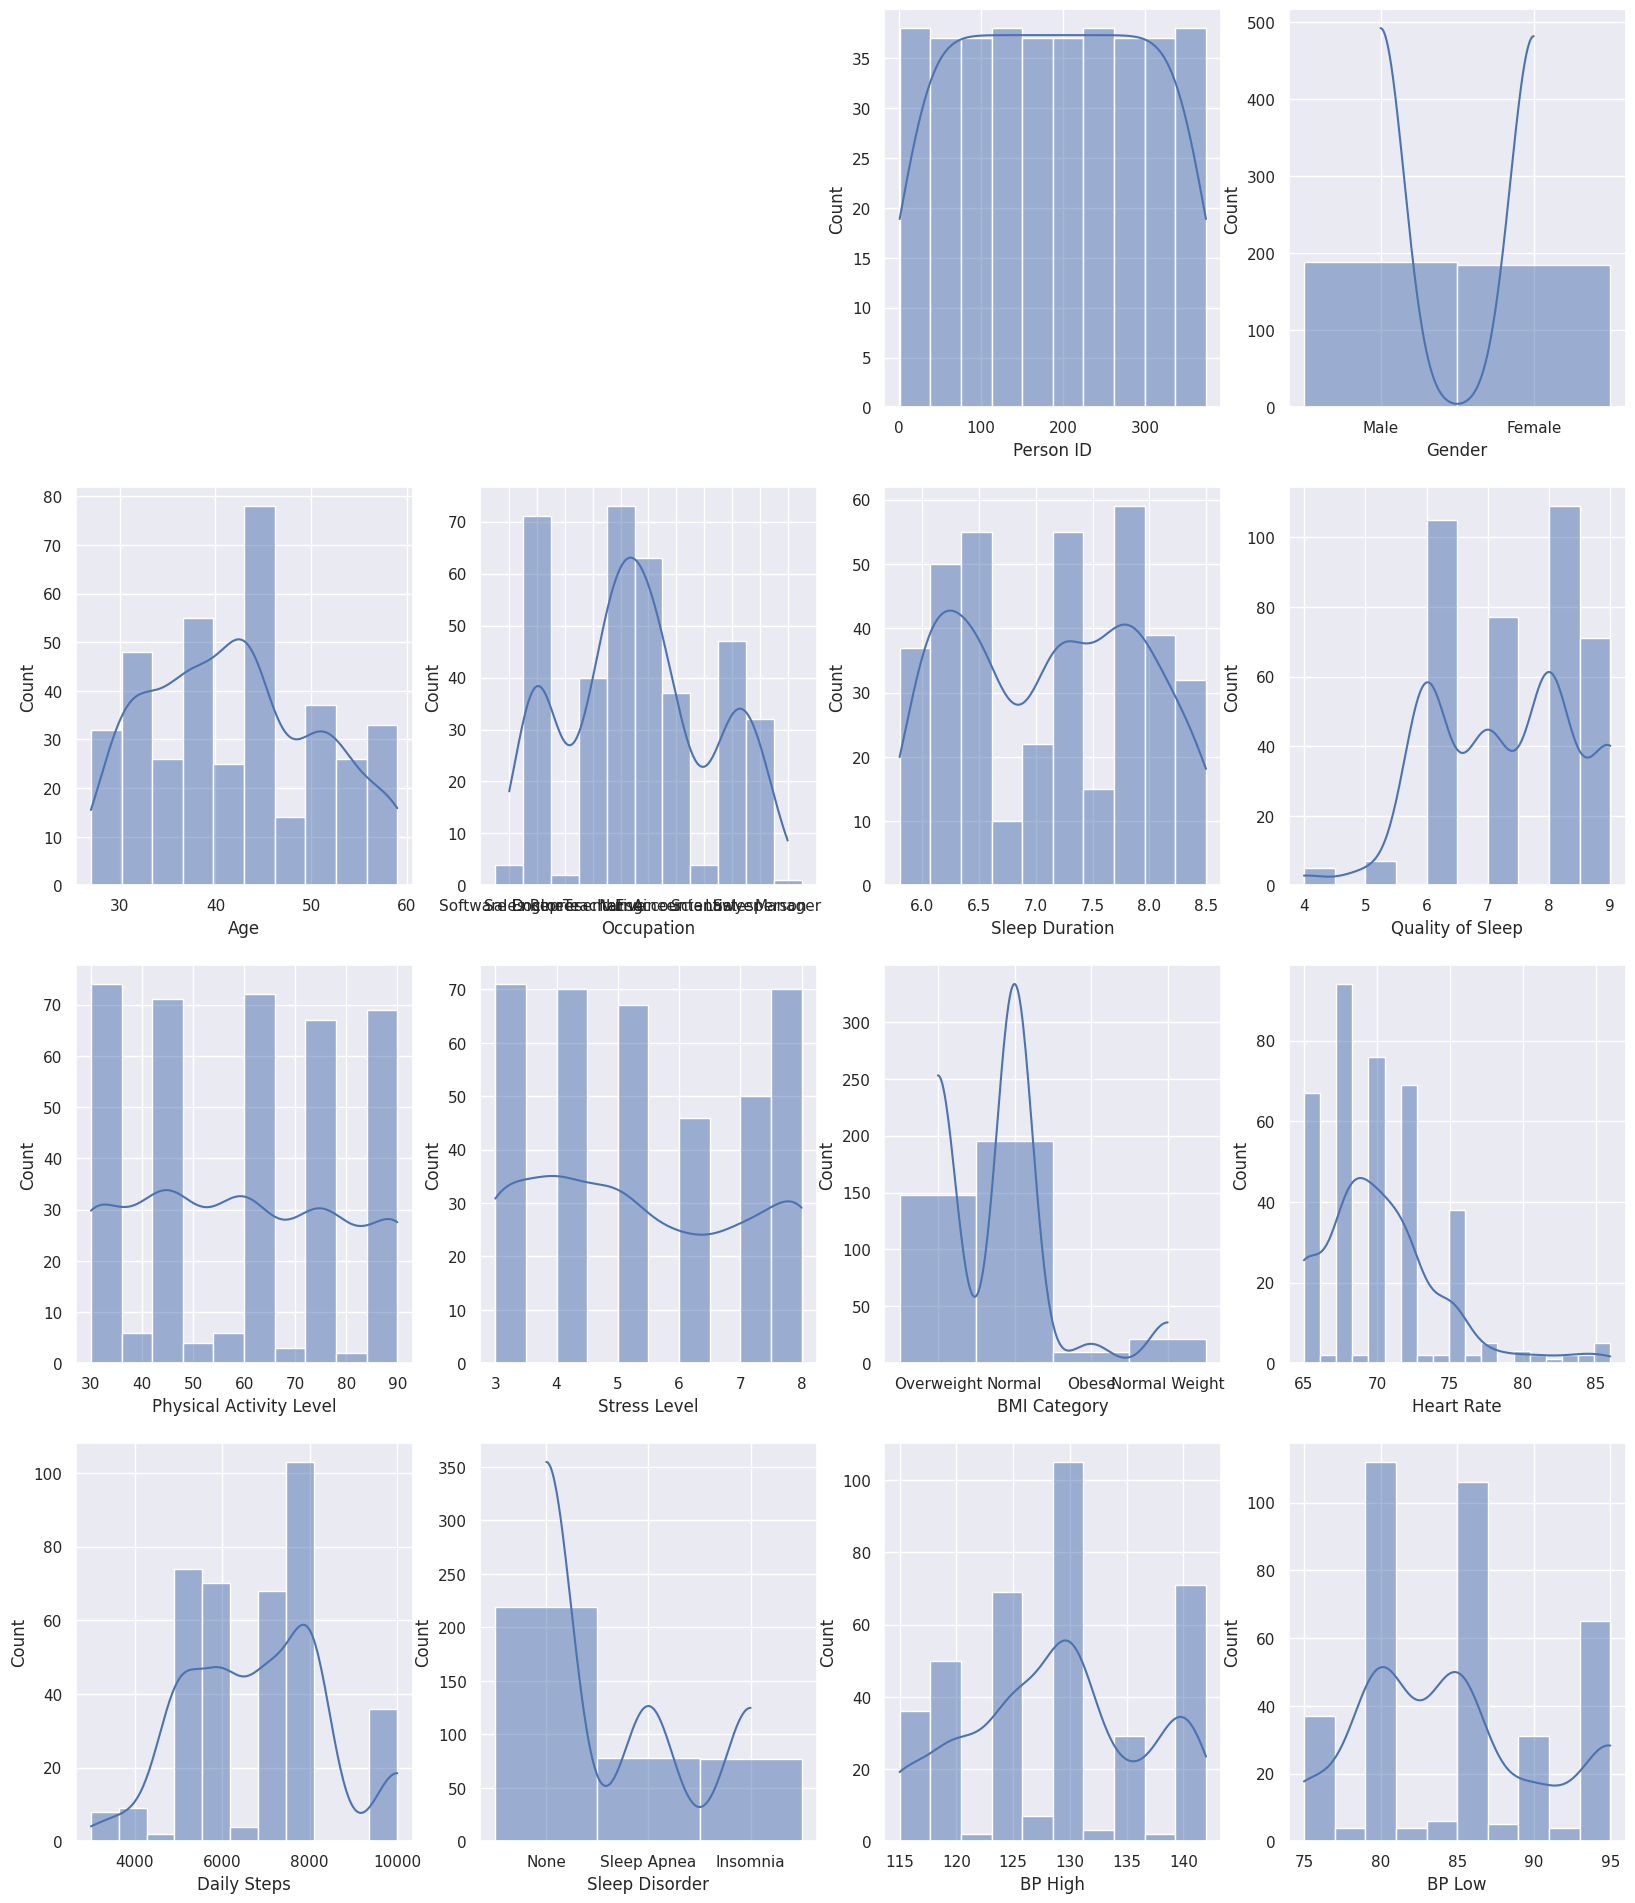

In [ ]:
plt.figure(figsize=(20,30))
for i in enumerate(df.columns):
  plt.subplot(5, 4, i[0]+3)
  sns.set(rc={'figure.figsize':(7,5)})
  sns.histplot(data=df, x=i[1], kde=True)
  #plt.title("{}'s distribution'".format(col))



* Quantity of sleep is left skewed
* Blood pressure distribution is not uniform
* Occupation is not uniform
* Age distribution is not uniform
* Heart Rate has outliers





<Axes: ylabel='Heart Rate'>

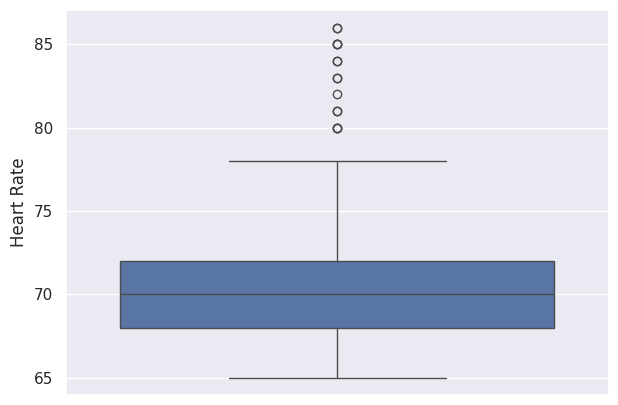

In [ ]:
sns.boxplot(df['Heart Rate'])

### **Treating outliers for Heart rate using IQR**

In [ ]:
def treat_outliers(df, colname):
  q1, q3 = df[colname].quantile([0.25, 0.75])
  iqr = q3-q1
  min = q1-(1.5*iqr)
  max = q3+(1.5*iqr)
  return min, max

treat_outliers(df, 'Heart Rate')

(62.0, 78.0)

### **Trimming outliers**

In [ ]:
lower, upper = treat_outliers(df, 'Heart Rate')
df['Heart Rate'] = np.where(df['Heart Rate'] > upper, upper, df['Heart Rate'])
df['Heart Rate'] = np.where(df['Heart Rate'] < lower, lower, df['Heart Rate'])

In [ ]:
df.to_csv('/content/drive/MyDrive/SH_cleaned_dataset.csv', index=False)

<Axes: ylabel='Heart Rate'>

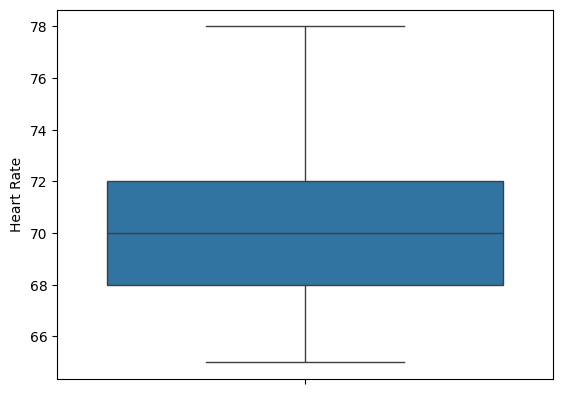

In [ ]:
sns.boxplot(df['Heart Rate'])

**Now the outliers has been resolved/treated**

In [ ]:
df.skew()

<ipython-input-30-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Person ID                  0.000000
Age                        0.257222
Sleep Duration             0.037554
Quality of Sleep          -0.207448
Physical Activity Level    0.074487
Stress Level               0.154330
Heart Rate                 0.469312
Daily Steps                0.178277
BP High                   -0.035669
BP Low                     0.378570
dtype: float64

In [ ]:
num_cols = list(df.select_dtypes(['int', 'float']).columns)
num_cols
cat_cols = list([x for x in df.columns if x not in num_cols])
cat_cols

['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

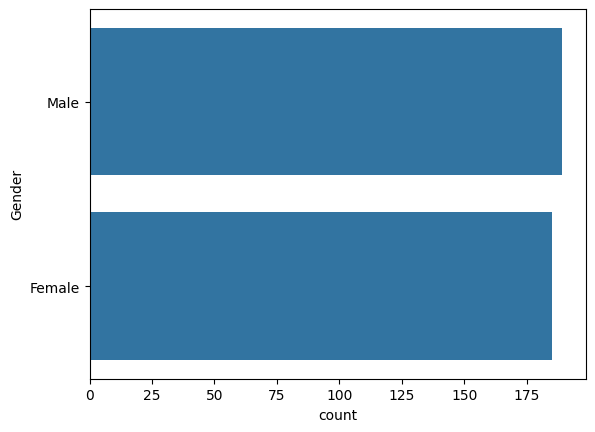

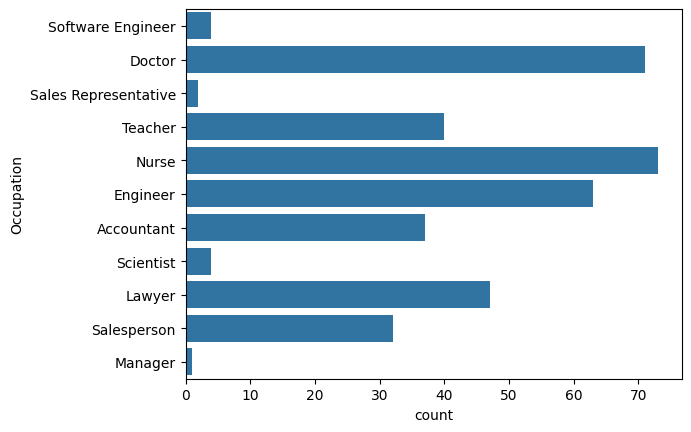

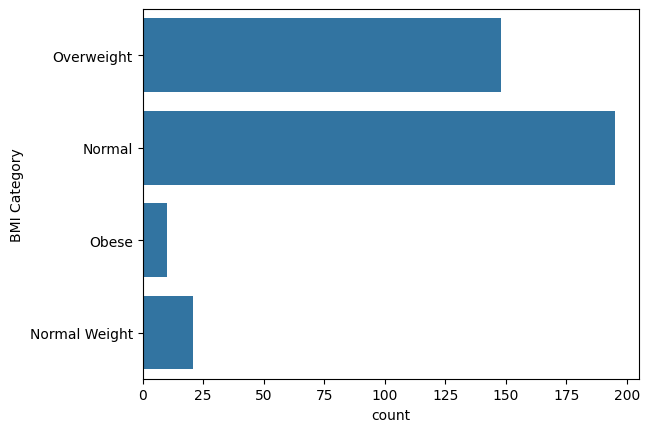

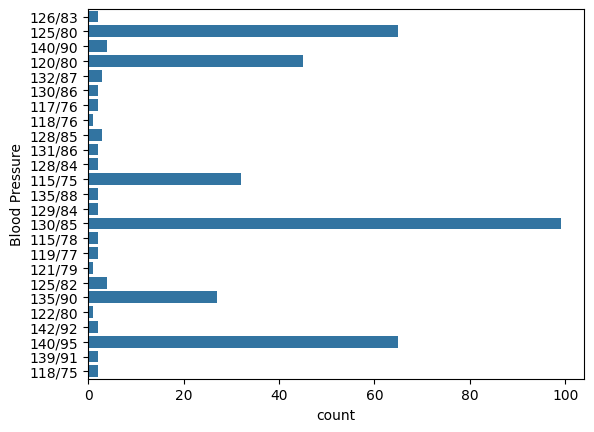

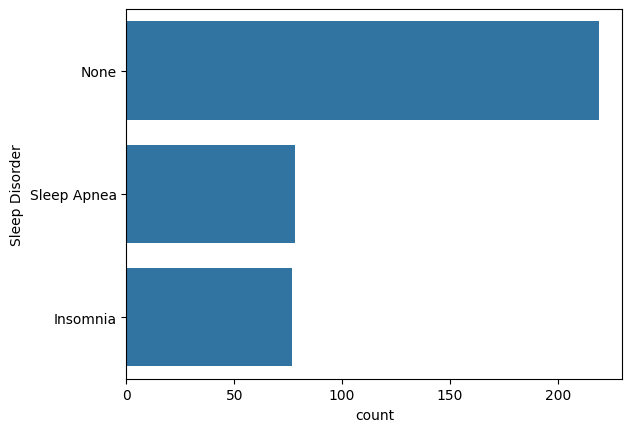

In [ ]:
for i in cat_cols:
  sns.countplot(df[i])
  plt.show()

### **Multi-Variate Analysis**

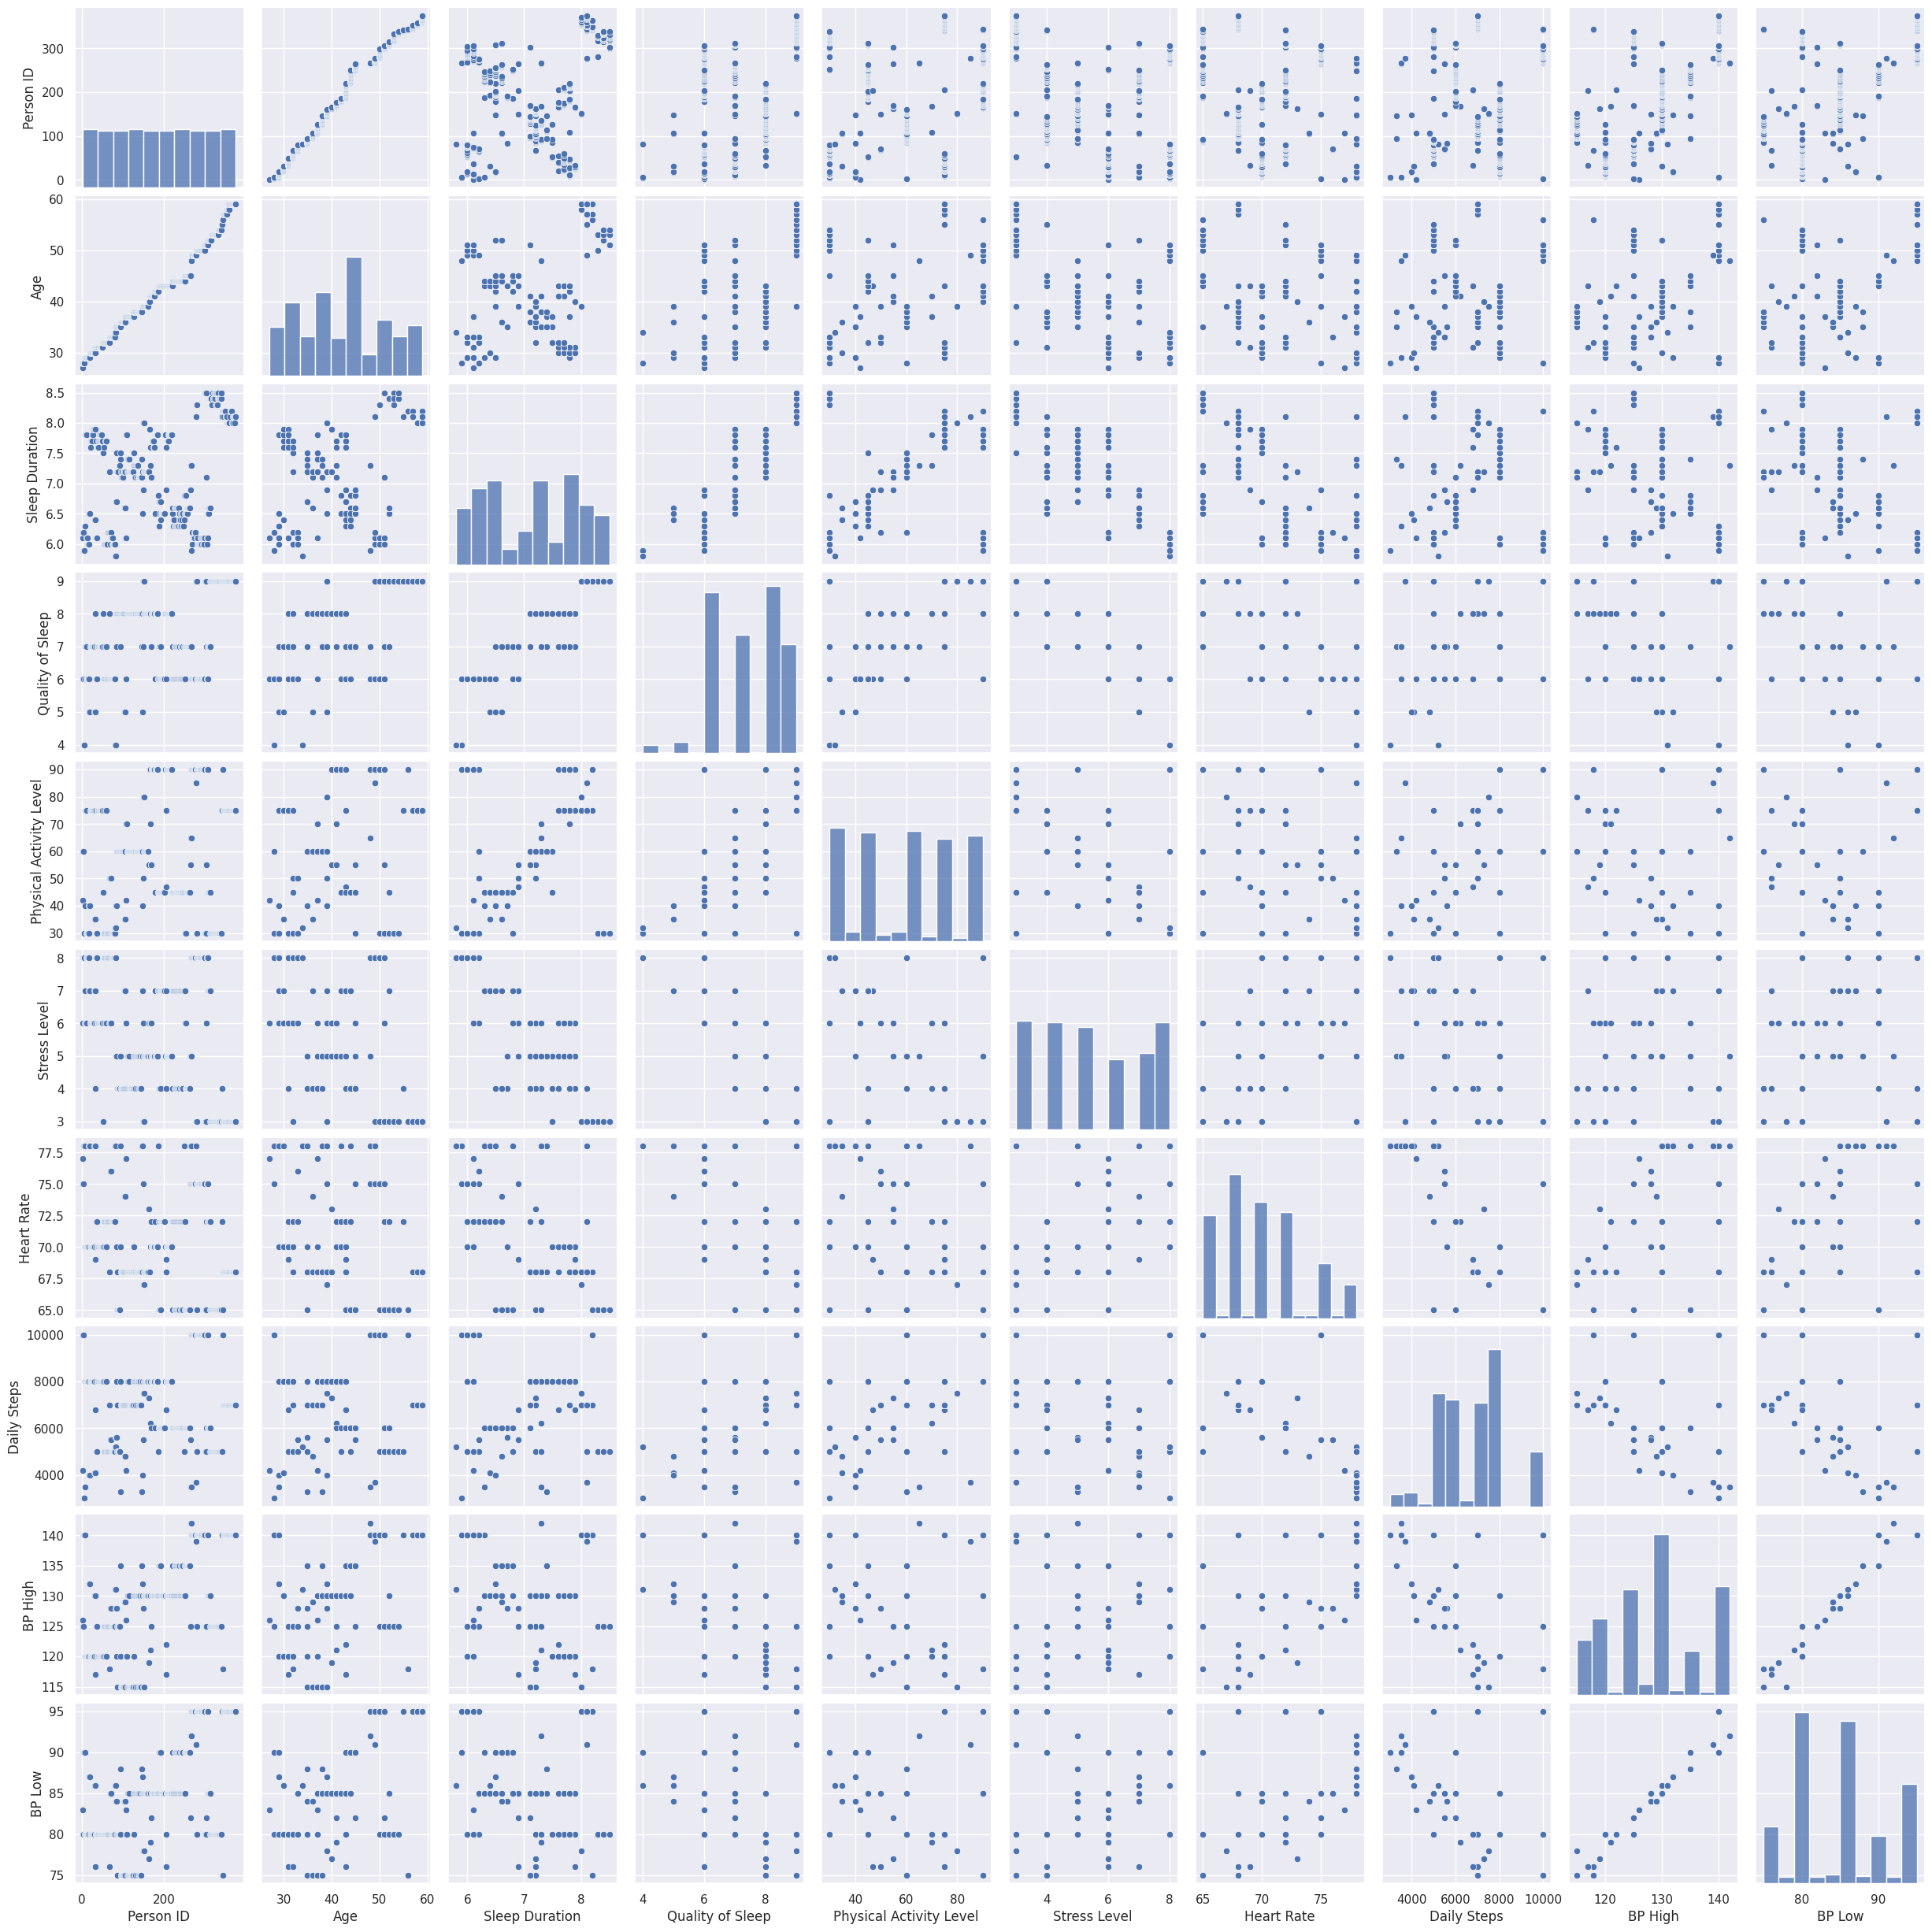

In [ ]:
sns.pairplot(df)
plt.show()

There is no relation between age and stress level

Get much sleep is make lower the stress level

Quality of the sleep can effect the stress level

Woman's has better quality of sleep than man's

Womans's stress level is lower than man's

Seems like more activity level is make better stress level

Genders have equal activity level

high heart rate is make higher to stress level

Also womans's have lower heart rate mean than mans.

In [ ]:
df.head(2)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BP High,BP Low
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77.0,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75.0,10000,None,125,80


In [ ]:
independent_features=[feature for feature in df.columns if feature not in ['Sleep Disorder']]

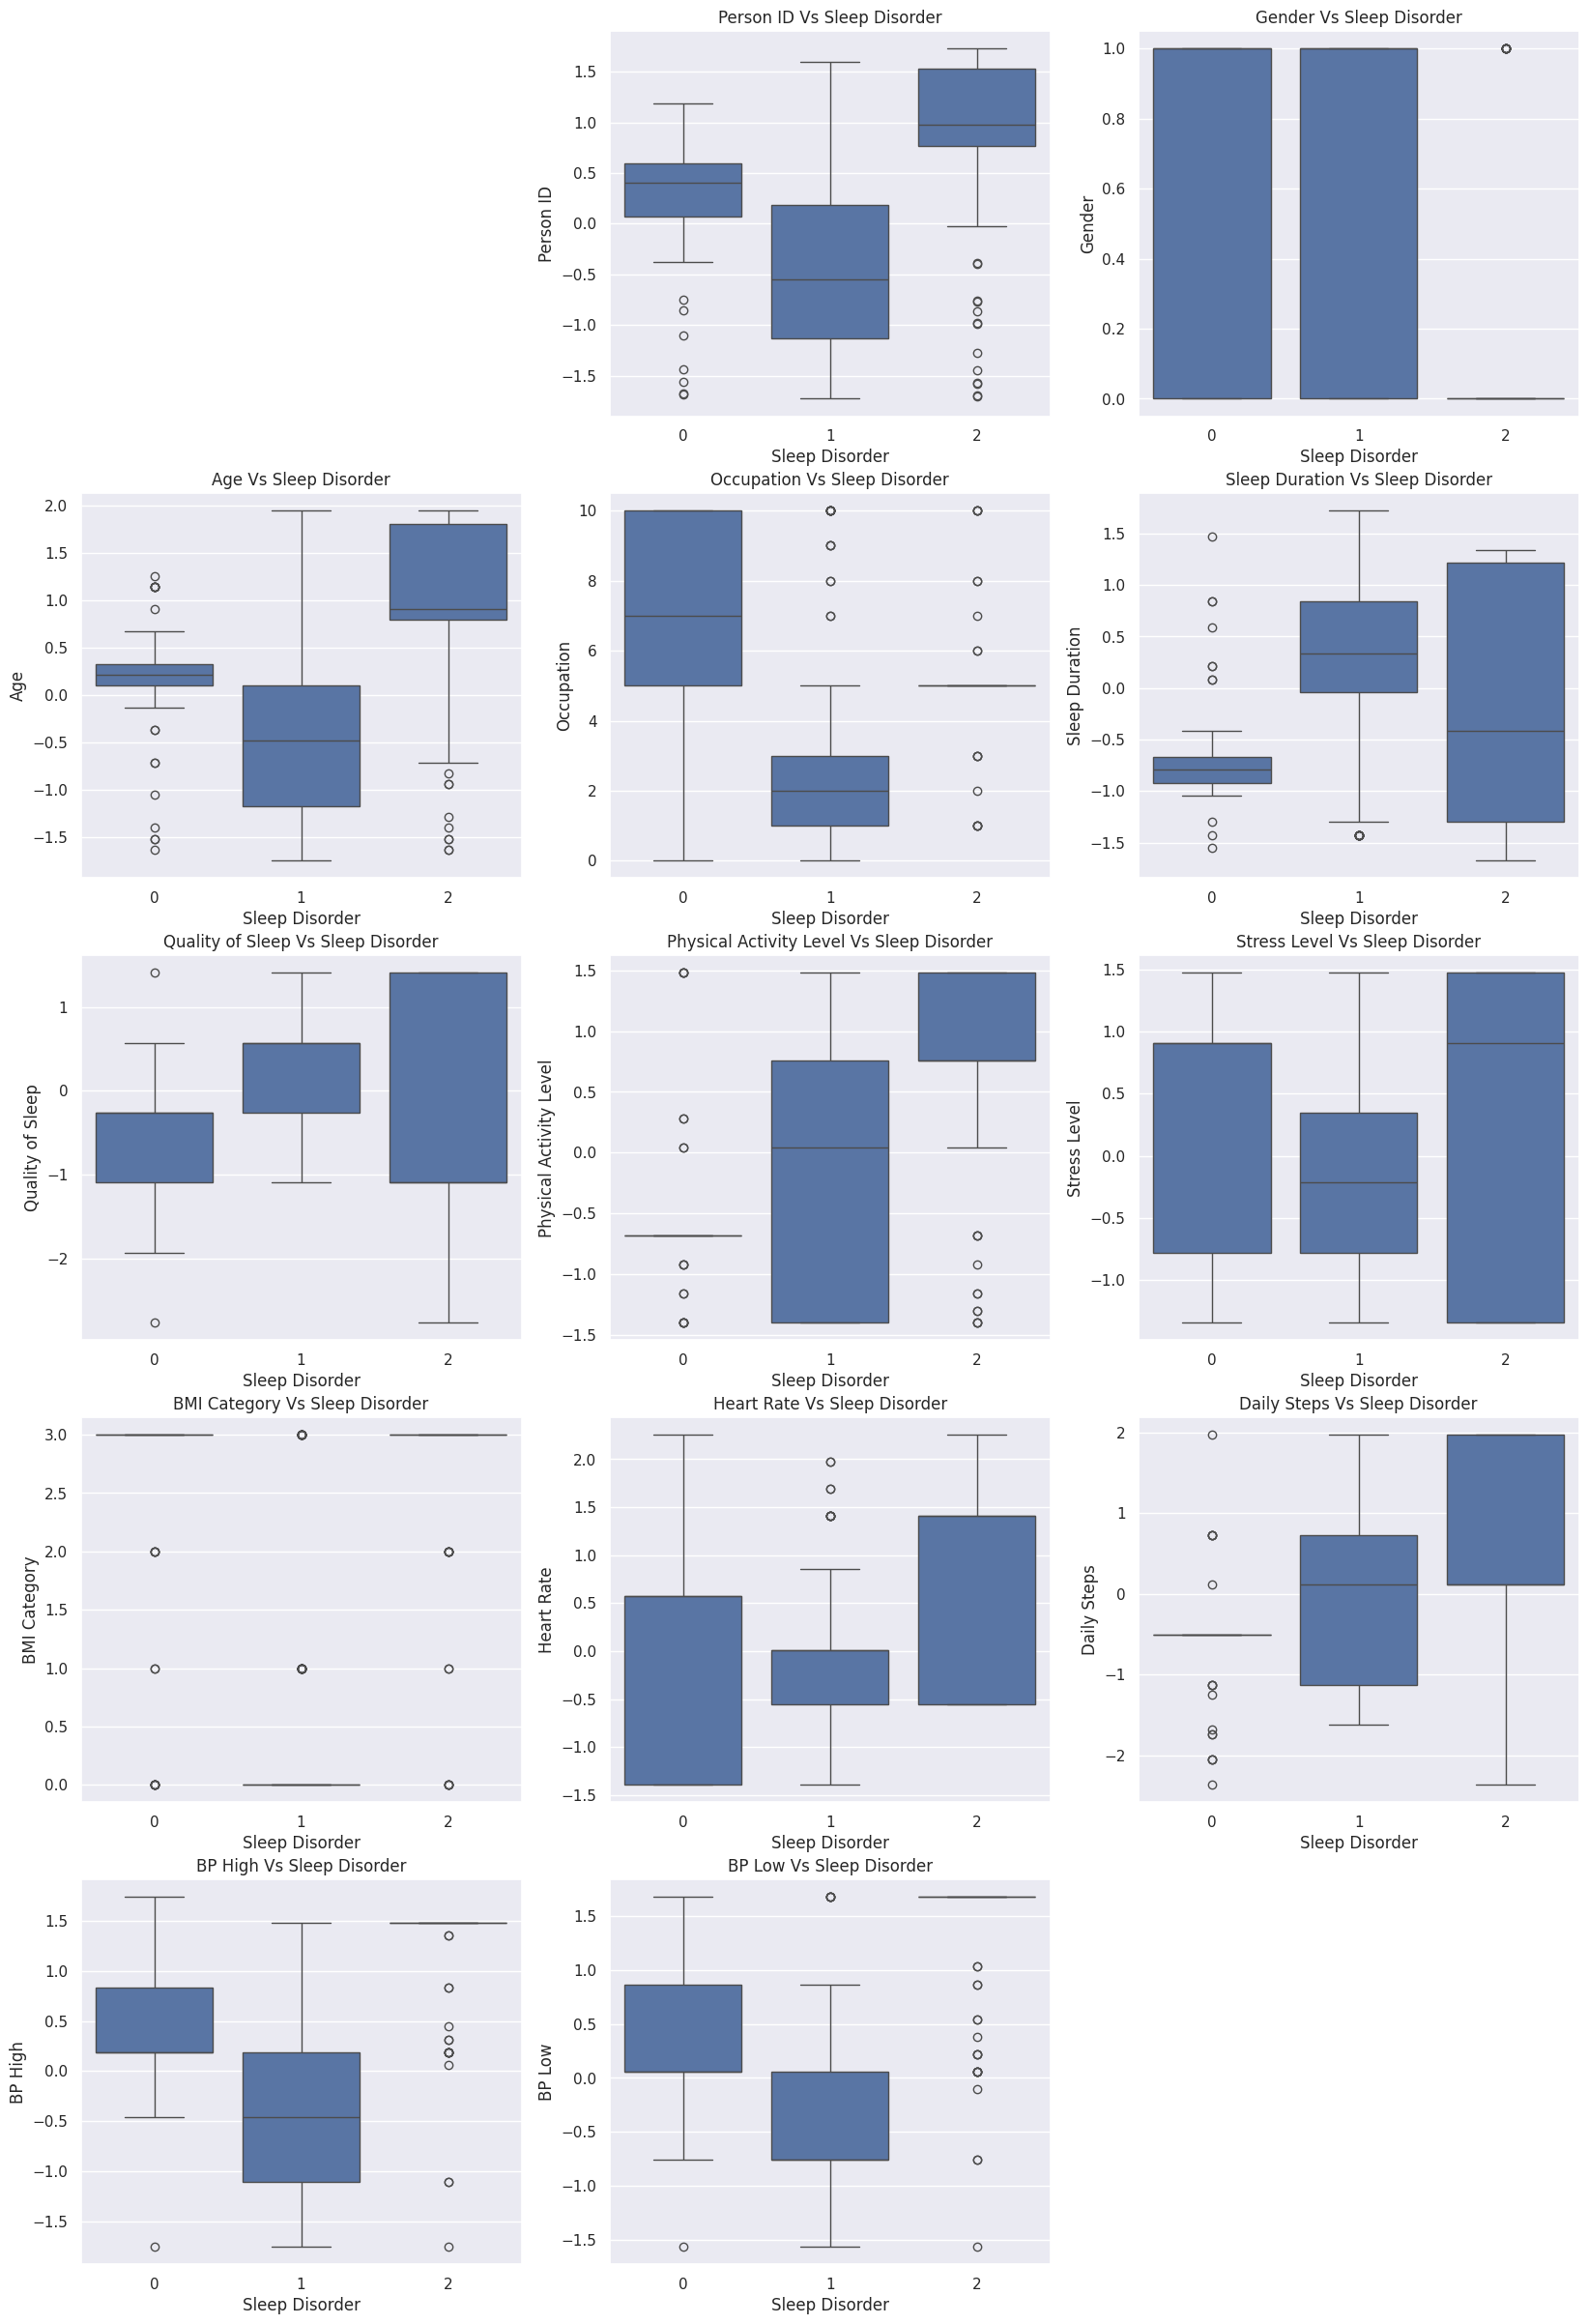

In [ ]:
plt.figure(figsize=(20,30))
for i in enumerate(independent_features):
  plt.subplot(5, 3, i[0]+2)
  sns.set(rc={'figure.figsize':(7,5)})
  sns.boxplot(data=df, y=i[1], x='Sleep Disorder')
  plt.title("{} Vs Sleep Disorder".format(i[1]))


## **Label Encoding**

In [ ]:
#Label Encoding as we have three unique values for our dependent categorical variable 'Sleep Disorder' : 'None', 'Insomnia', 'Sleep Apnea'
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in cat_cols:
    df[column] = le.fit_transform(df[column])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for column in num_cols:
    df[column] = scaler.fit_transform(df[column].values.reshape(-1,1))

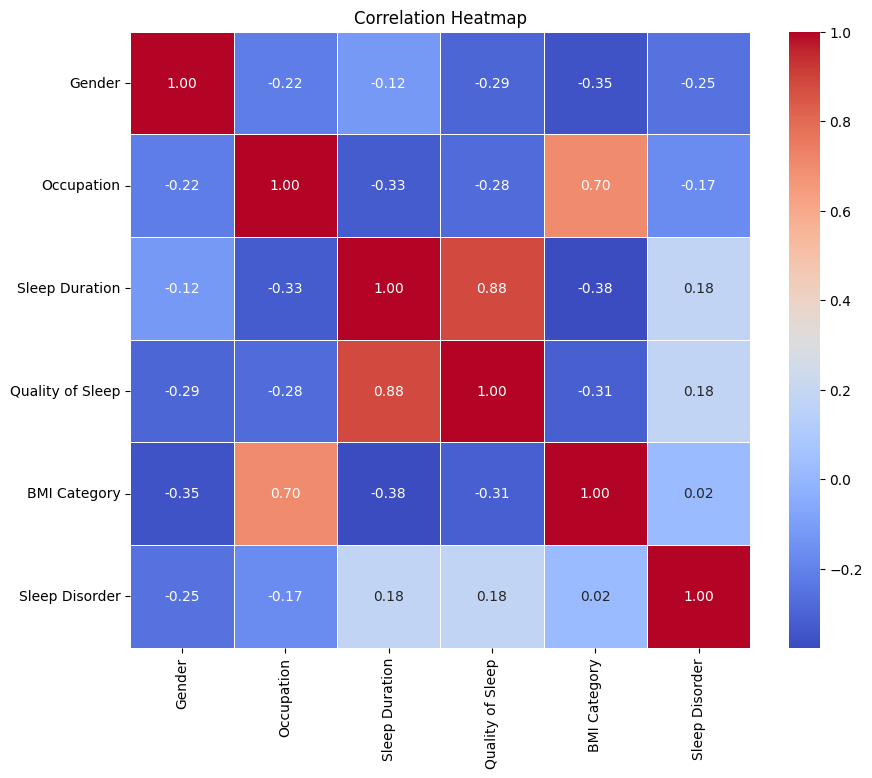

In [ ]:
# Select columns to use in heatmap
selected_columns = ['Gender', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'BMI Category', 'Sleep Disorder']

# Count the correlation between columns
correlation_matrix = df[selected_columns].corr()

# Make heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Heatmap Evaluation


*   Tthere is a correlation between Occupation and BMI Category.
*   Quality of sleep is highly correlated with Sleep duration.



In [ ]:
df.head(2)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BP High,BP Low
0,-1.727426,0.989361,-1.753096,1.712741,-1.298887,-1.09828,-0.825418,0.347021,1.191629,1.974677,-1.619584,1,-0.330002,-0.268102
1,-1.718163,0.989361,-1.637643,-0.908497,-1.173036,-1.09828,0.039844,1.475592,-0.907284,1.413271,1.970077,1,-0.459239,-0.755640


## **Model Building**

Modelling will be done only on train data.

In [ ]:
X = df.drop(columns=['Sleep Disorder'])
y = df['Sleep Disorder']

In [ ]:
### random state train test split will be same with all people using random_state=16
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=16)
#test_size = 0.15 implies we have taken 15% of the total data as test data and random_state = 16 implies different train and test sets will be generated across different executions.
#if random_state = True -> fixed sets will be generated.

In [ ]:
X_train.head(2)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,BP High,BP Low
26,-1.486605,0.989361,-1.406737,-0.908497,0.840575,-0.261708,0.760896,0.347021,-0.907284,0.009757,0.732263,-1.105421,-0.755640
221,0.319551,0.989361,0.209606,1.057431,-0.921335,-1.098280,-0.681208,0.911306,1.191629,0.571163,-0.505551,0.186944,0.056923


In [ ]:
y_train.head(2)

26     1
221    0
Name: Sleep Disorder, dtype: int64

In [ ]:
df['Sleep Disorder'].nunique()

3

### **Feature Selection**

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming 'target' is your categorical target variable
target = 'Sleep Disorder'

# Create an empty DataFrame to store the results
chi_square_results = pd.DataFrame(columns=['Variable', 'Chi-Square', 'P-Value'])

# Loop through each independent variable
for variable in df.columns:
    if variable != target:
        # Create a contingency table
        contingency_table = pd.crosstab(df[variable], df[target])

        # Perform chi-square test
        chi2, p, _, _ = chi2_contingency(contingency_table)

        # Append results to the DataFrame
        chi_square_results = chi_square_results.append({
            'Variable': variable,
            'Chi-Square': chi2,
            'P-Value': p
        }, ignore_index=True)

# Print the results
print(chi_square_results)


                   Variable  Chi-Square       P-Value
0                 Person ID  748.000000  4.724994e-01
1                    Gender   54.306020  1.612863e-12
2                       Age  447.074575  1.457533e-60
3                Occupation  421.362755  7.481314e-77
4            Sleep Duration  434.548392  8.440547e-62
5          Quality of Sleep  156.959670  1.373652e-28
6   Physical Activity Level  343.957876  5.051001e-55
7              Stress Level  240.199368  6.221717e-46
8              BMI Category  246.968163  1.822932e-50
9                Heart Rate  245.009940  1.429509e-39
10              Daily Steps  432.401706  2.311053e-68
11                  BP High  426.076724  2.799307e-69
12                   BP Low  435.550225  2.546427e-72


<ipython-input-25-a62983805def>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chi_square_results = chi_square_results.append({
<ipython-input-25-a62983805def>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chi_square_results = chi_square_results.append({
<ipython-input-25-a62983805def>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chi_square_results = chi_square_results.append({
<ipython-input-25-a62983805def>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chi_square_results = chi_square_results.append({
<ipython-input-25-a62983805def>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas

A small p-value (typically below 0.05) indicates that the relationship is statistically significant.

Age, Occupation, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, BMI Category, Heart Rate, Daily Steps, BP High, BP Low:

All these variables have extremely low p-values (close to zero), indicating a highly significant association with the target variable.

## **Splitting data into Training and Test data**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming X is your feature matrix and y is the encoded label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
#Important metric for precision and recall
print(classification_report(y_test, y_pred))


Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.95      0.95      0.95        43
           2       0.93      0.81      0.87        16

    accuracy                           0.91        75
   macro avg       0.89      0.88      0.88        75
weighted avg       0.91      0.91      0.91        75



## **Logistic Regression**

In [ ]:
### Creating a Logistic regression object
logistic_reg=LogisticRegression(random_state = 0)

In [ ]:
### Passing independant and dependant training data to the model
logistic_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

## **Using Above Model to get prediction for test data**

In [ ]:
logistic_reg_pred=logistic_reg.predict(X_test)
logistic_reg_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 0,
       1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 2, 2])

We can say our model is predicting the values with 91% of accuracy.

# **Performance Metrics**
## **Confusion Matrix**

In [ ]:
confusion_mat=confusion_matrix(y_test, logistic_reg_pred)
confusion_mat

array([[14,  1,  1],
       [ 2, 41,  0],
       [ 2,  1, 13]])

## **Accuracy Score**

In [ ]:
### accuracy using accuracy_score
print(round(accuracy_score(y_test, logistic_reg_pred), 2))

0.91


## **Precision Score**

In [ ]:
#the average parameter of the precision_score function is set to binary. The average parameter can be set to one of the following values:

#None: The precision is calculated for each class separately.
#micro: The precision is calculated across all classes.
#macro: The precision is calculated for each class and then averaged.
#weighted: The precision is calculated for each class and then weighted by the number of samples in each class.
#In this case, the average parameter should be set to micro, macro, or weighted.

print(round(precision_score(y_test, logistic_reg_pred, average='weighted'), 2))

0.91


## **Recall Score**

In [ ]:
print(round(recall_score(y_test, logistic_reg_pred, average='macro'), 2))

0.88


## **F-1 Score**

In [ ]:
from sklearn.metrics import f1_score
print(round(f1_score(y_test, logistic_reg_pred, average = 'weighted'), 2))

0.91
